In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
# tf.autograph.set_verbosity(0)


# # from lab_utils_softmax import plt_softmax # type: ignore
# np.set_printoptions(precision=2)
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.activations import linear, relu, sigmoid
# %matplotlib widget
# import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
# tf.autograph.set_verbosity(0)

# from public_tests import * 

# from autils import *
# from lab_utils_softmax import plt_softmax
# np.set_printoptions(precision=2)

2024-05-08 14:48:05.273190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X = np.load('dataset_oldsim_2x100x500_crop9087_shuffled.npy')
train_data = X[:400,:1].transpose(0,2,3,1)
test_data = X[400:,:1].transpose(0,2,3,1)
labels = np.load('labels_dataset_oldsim_2x100x500_crop9087_shuffled.npy')
reshaped_train_data = train_data.reshape(train_data.shape[0], -1)
reshaped_test_data = test_data.reshape(test_data.shape[0], -1)



In [3]:
np.shape(train_data), np.shape(labels), np.shape(reshaped_train_data)

((400, 100, 500, 1), (400,), (400, 50000))

In [4]:
import keras
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(2) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        keras.Input(shape=(50000,)),
        Dense(25,'relu'),
        # Dense(15,'relu'),
        Dense(10, 'linear'),
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)



2024-05-08 14:48:11.624667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-08 14:48:11.626112: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
)

history = model.fit(
    reshaped_train_data, labels,
    epochs=100,
)

Epoch 1/100


2024-05-08 14:48:15.116546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-08 14:48:15.167179: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_2.


13/13 [==============================] - 1s 24ms/step - loss: 26.8666
Epoch 2/100
13/13 [==============================] - 0s 19ms/step - loss: 3.1762
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 3.3495
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 3.3005
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 3.3560
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 3.3413
Epoch 7/100
13/13 [==============================] - 0s 19ms/step - loss: 3.4028
Epoch 8/100
13/13 [==============================] - 0s 18ms/step - loss: 3.1979
Epoch 9/100
13/13 [==============================] - 0s 23ms/step - loss: 3.1239
Epoch 10/100
13/13 [==============================] - 0s 19ms/step - loss: 3.0203
Epoch 11/100
13/13 [==============================] - 0s 20ms/step - loss: 2.9486
Epoch 12/100
13/13 [==============================] - 0s 19ms/step - loss: 2.9189
Epoch 13/100
13/13 [================

1/1 [==============================] - 0s 19ms/step


2024-05-08 14:48:46.528804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 19ms/step


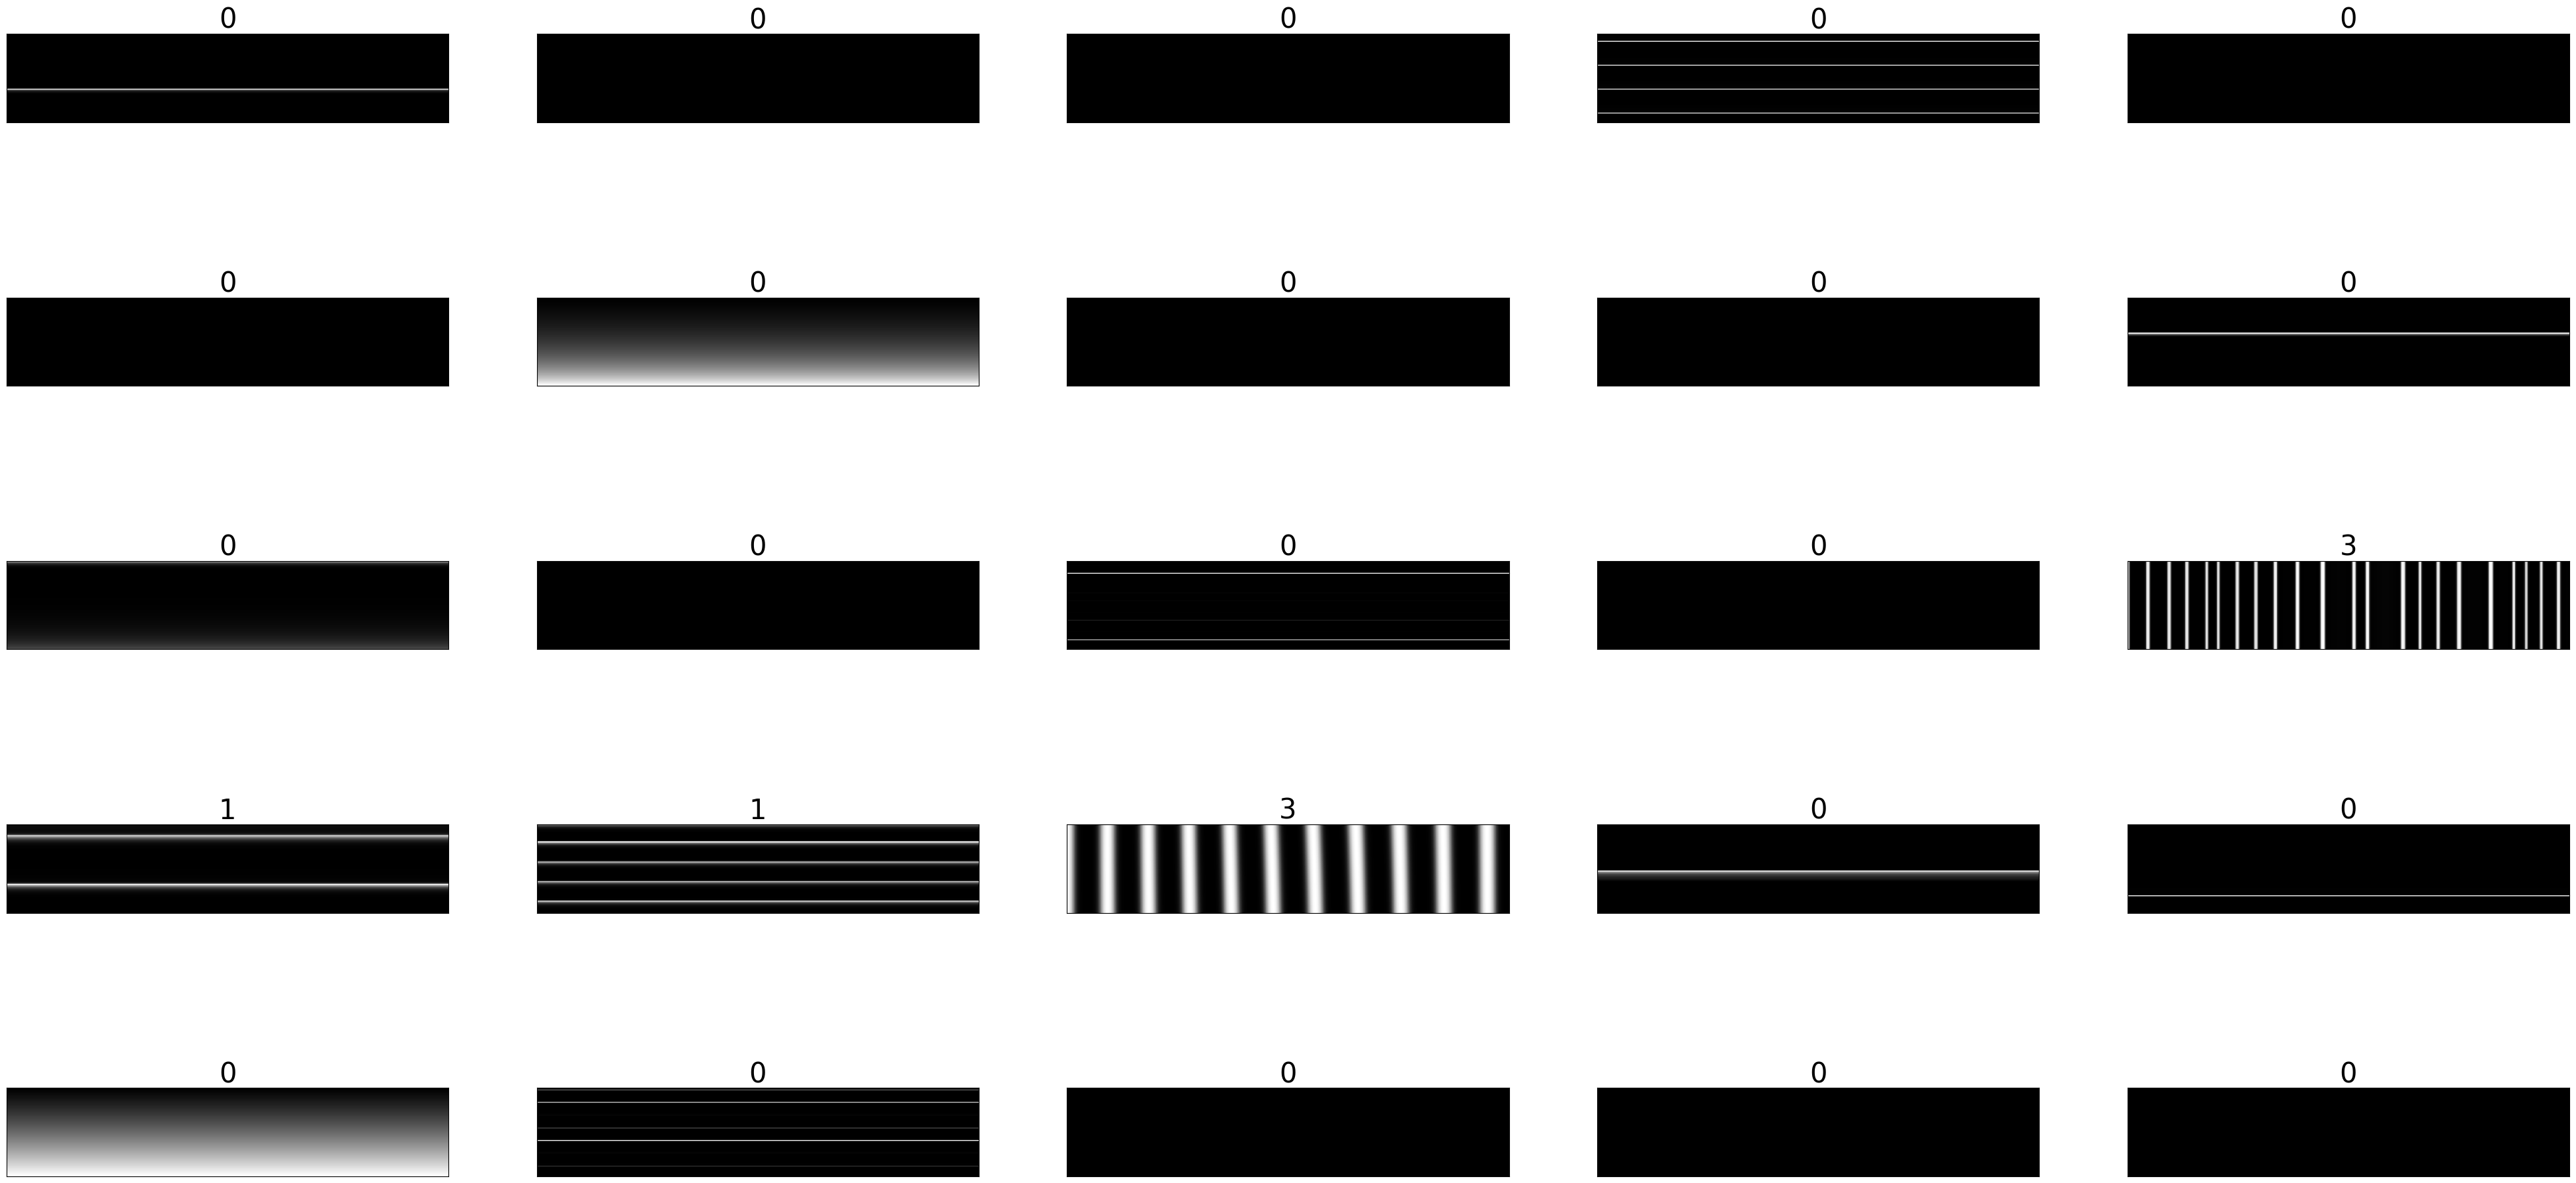

In [6]:

fig, axes = plt.subplots(5,5, figsize=(50,25))
# fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):

    ax.imshow(train_data[i], cmap='gray')

    prediction = model.predict(reshaped_train_data[i].reshape(1,50000))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f"{yhat}", fontsize=30)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)




1/1 [==============================] - 0s 19ms/step


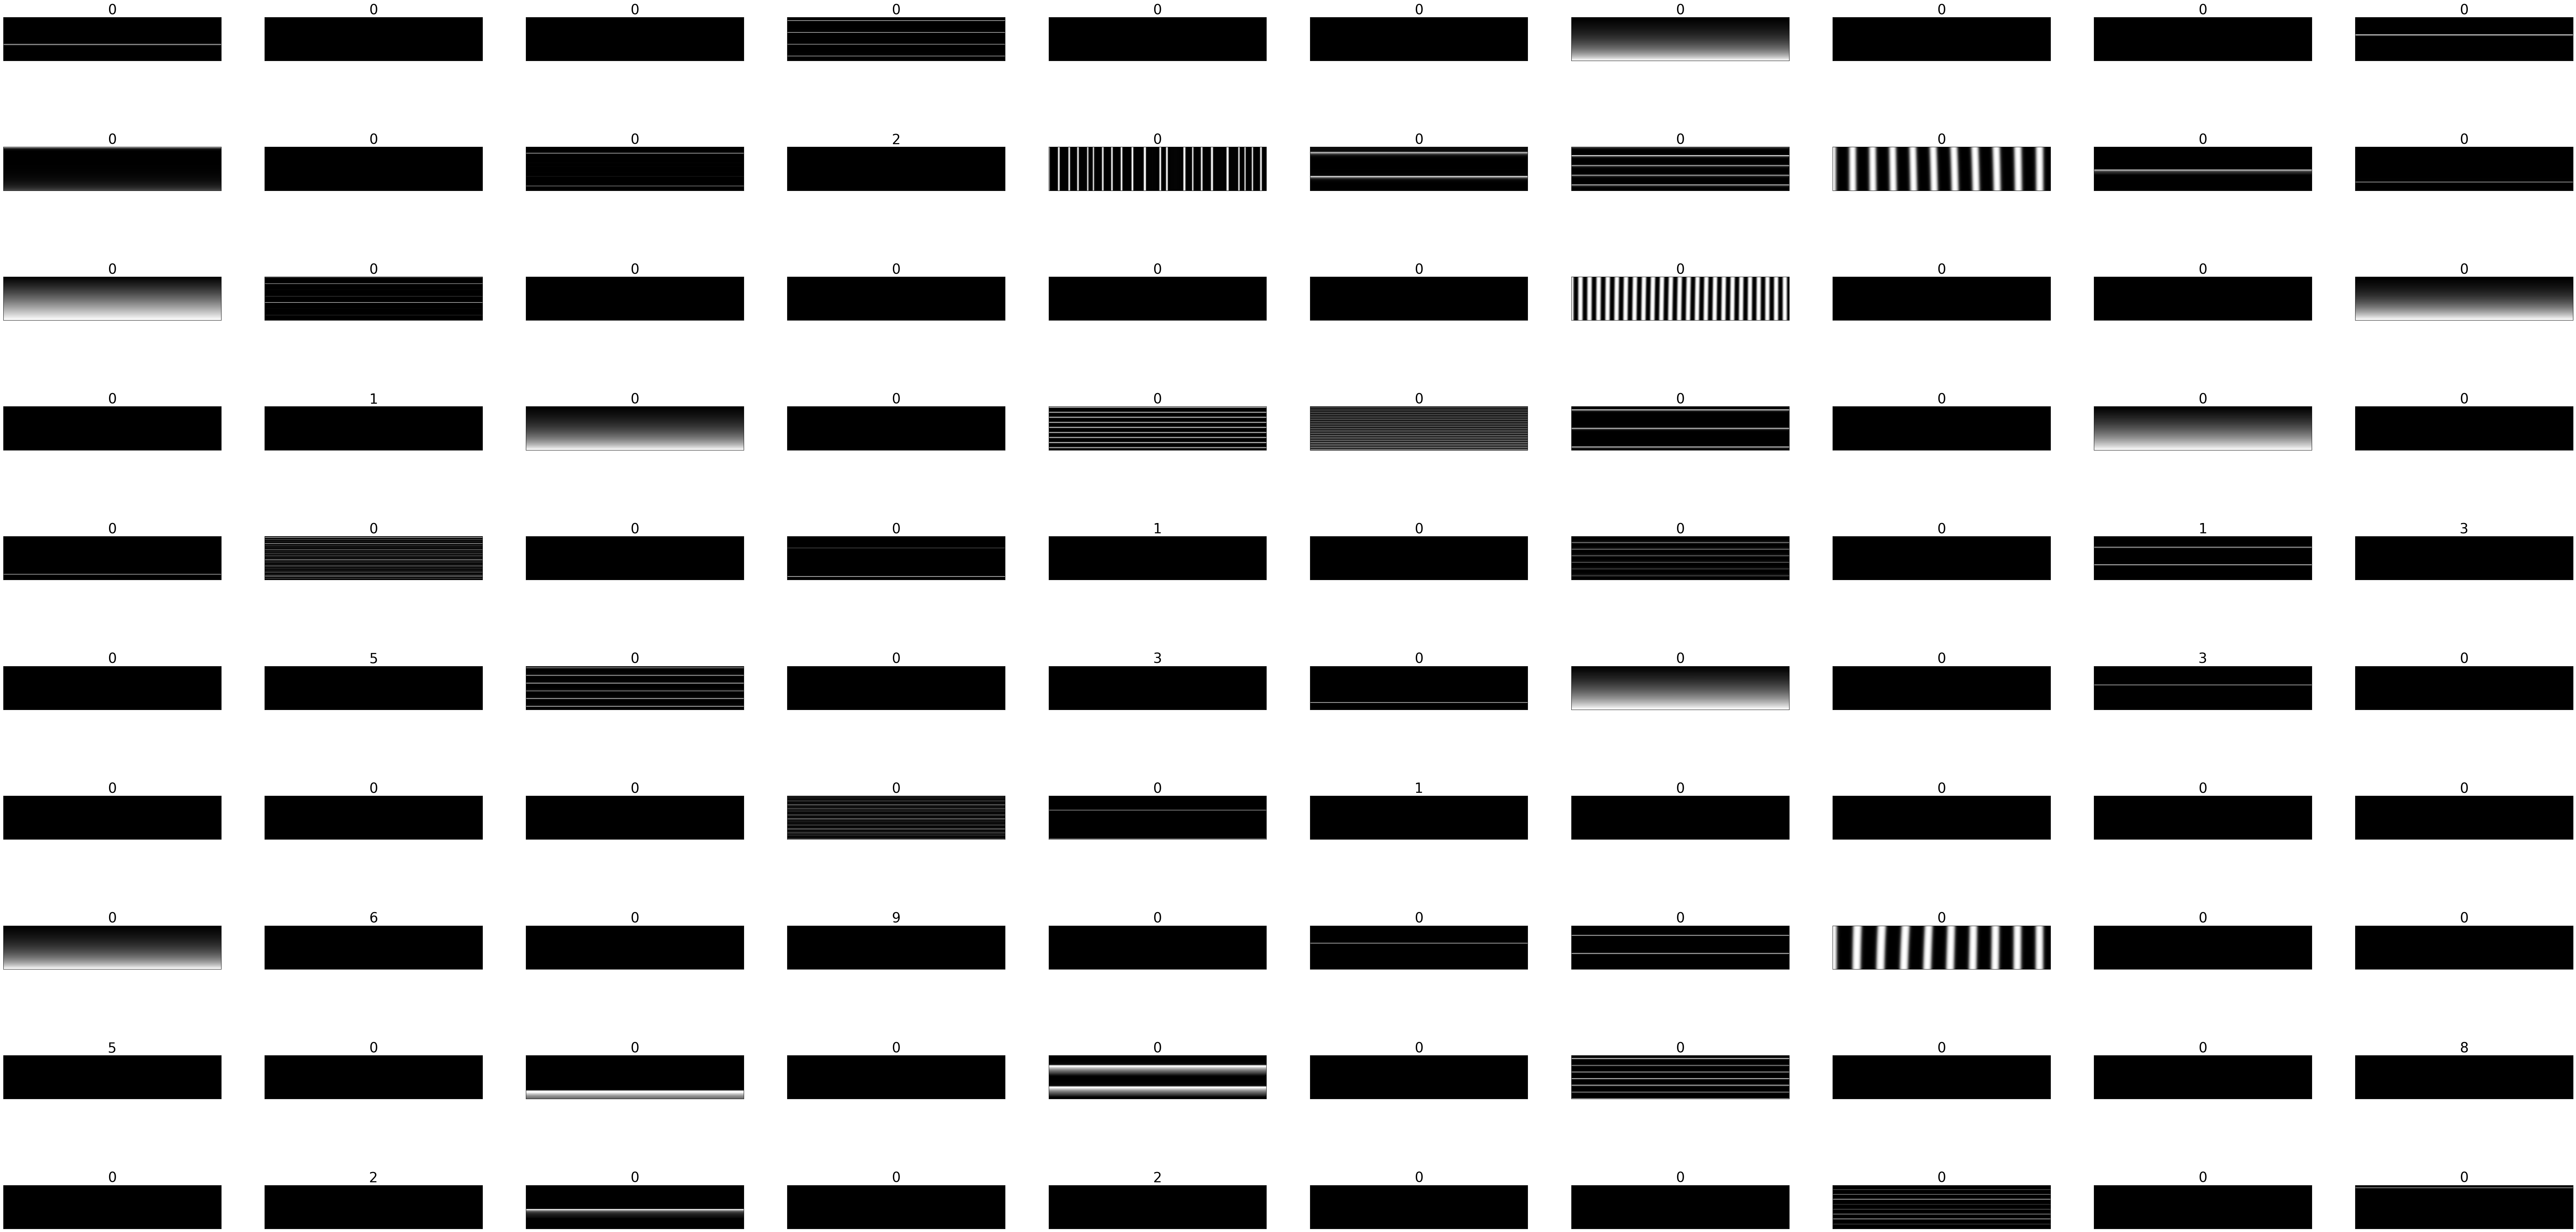

In [7]:

fig, axes = plt.subplots(10,10, figsize=(100,50))
# fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):

    ax.imshow(train_data[i], cmap='gray')

    prediction = model.predict(reshaped_test_data[i].reshape(1,50000))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f"{yhat}", fontsize=30)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


